In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
datadir = os.getcwd()

datafile = '/betaPic_AS.fou'

freq, ampl = np.loadtxt(datadir + datafile, usecols=(0,1)).T

In [6]:
datafile1 = '/results/betaPic_mag_snr_4_w_2/000_078/results.txt'
freqs, ampls, phs = np.loadtxt(datadir + datafile1, usecols=(0,3,5), skiprows=2).T

In [7]:
freqs

array([4.74387795e+01, 5.36918573e+01, 5.04918117e+01, 5.42377892e+01,
       3.90630172e+01, 4.65429672e+01, 4.89187461e+01, 4.35278167e+01,
       4.72847618e+01, 5.74521475e+01, 3.47605287e+01, 3.81291601e+01,
       4.52695696e+01, 5.14965725e+01, 4.72694407e+01, 5.38543749e+01,
       4.97127341e+01, 5.08312130e+01, 4.38288260e+01, 6.51349163e+01,
       4.46832901e+01, 4.95595440e+01, 4.20359137e+01, 4.16503221e+01,
       4.81377499e+01, 4.59002486e+01, 5.02686343e+01, 7.56781453e+01,
       5.83467911e+01, 5.42269055e+01, 4.54372119e+01, 5.44632370e+01,
       5.35527827e+01, 4.21731032e+01, 5.82518801e+01, 4.23962544e+01,
       1.81148516e-01, 3.03422877e-01, 5.87262431e-02, 3.94100555e-02,
       5.29219561e+01, 5.36828773e+01, 5.70479514e+01, 5.06451721e+01,
       3.74791239e+01, 1.94588390e-02, 6.93759073e+01, 4.13194277e+01,
       6.14471562e+01, 2.28146398e+01, 6.46158531e+01, 7.10448592e+01,
       2.80782407e-01, 5.23033527e+01, 4.74081733e+01, 7.63170906e+01,
      

<Figure size 432x288 with 0 Axes>

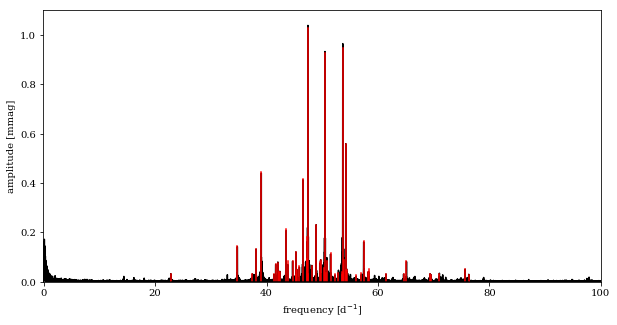

In [8]:
plt.rc('font', family='serif')
plt.tight_layout()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(freq, ampl*1000, c='k')

mask_freqs_big = freqs > 1

ax.stem(freqs[mask_freqs_big], ampls[mask_freqs_big]*1000, markerfmt=' ', basefmt='k', linefmt='r-')

#ax.setp(baseline, 'color', 'r', 'linewidth', 2)

ax.set_xlabel('frequency [d$^{-1}$]')
ax.set_ylabel('amplitude [mmag]')

ax.set_xlim(-0.1, 100.1)
ax.set_ylim(-0.001, 1.1)

plt.show()

fig.savefig('betaPic_as.pdf', bbox_inches='tight')

In [37]:
Flist = []

for i in range(1, len(freqs[mask_freqs_big])+1):
    tmp = 'F{0}'.format(i)
    Flist.append(tmp)

In [38]:
compl_list = []
for i in range(len(freqs[mask_freqs_big])):
    compl_list.append([Flist[i], freqs[mask_freqs_big][i], ampls[mask_freqs_big][i], phs[mask_freqs_big][i]/(2*np.pi)])

In [40]:
datapairs = np.stack((Flist, freqs[mask_freqs_big], ampls[mask_freqs_big], phs[mask_freqs_big]/(2*np.pi)), axis=-1)
np.savetxt('complete_list.txt',datapairs, fmt="%s")

In [43]:
freqs[mask_freqs_big]

array([47.43877949, 53.69185728, 50.49181171, 54.2377892 , 39.06301719,
       46.54296717, 48.91874608, 43.52781675, 47.28476177, 57.45214754,
       34.76052867, 38.12916008, 45.2695696 , 51.49657248, 47.26944069,
       53.85437491, 49.71273407, 50.83121297, 43.82882603, 65.13491632,
       44.68329014, 49.559544  , 42.03591374, 41.65032209, 48.13774985,
       45.90024862, 50.26863434, 75.67814529, 58.3467911 , 54.22690546,
       45.43721189, 54.46323702, 53.55278274, 42.17310319, 58.25188011,
       42.39625437, 52.92195611, 53.6828773 , 57.04795136, 50.64517211,
       37.47912389, 69.37590725, 41.31942767, 61.44715615, 22.81463984,
       64.61585311, 71.04485918, 52.30335269, 47.40817332, 76.3170906 ,
       45.35535781, 53.49891597, 69.55335697, 56.10990095])

In [44]:
ampls[mask_freqs_big]

array([1.02969806e-03, 9.47833479e-04, 9.24916317e-04, 5.56907139e-04,
       4.43584375e-04, 4.14833201e-04, 2.30943659e-04, 2.14321732e-04,
       1.81914906e-04, 1.63394966e-04, 1.43010091e-04, 1.31851570e-04,
       1.20126627e-04, 1.18355613e-04, 9.36691025e-05, 8.68348517e-05,
       8.64686588e-05, 8.55986570e-05, 8.35962620e-05, 8.29709751e-05,
       8.21919164e-05, 7.86869467e-05, 7.65639908e-05, 7.08283147e-05,
       6.42366635e-05, 6.30512573e-05, 5.49948816e-05, 5.20910035e-05,
       4.97273336e-05, 4.95800396e-05, 4.79174084e-05, 4.64029288e-05,
       4.07227606e-05, 4.06145075e-05, 3.92296453e-05, 3.87455670e-05,
       3.64850522e-05, 3.40541652e-05, 3.39431433e-05, 3.36460167e-05,
       3.31858816e-05, 3.24760210e-05, 3.21317421e-05, 3.13779933e-05,
       3.13930099e-05, 3.09399203e-05, 3.04100223e-05, 2.98870272e-05,
       2.97276978e-05, 2.93701595e-05, 2.88891401e-05, 2.87023192e-05,
       2.78300493e-05, 2.76798823e-05])

In [45]:
phs[mask_freqs_big]/(2*np.pi)

array([0.04449748, 0.9905598 , 0.35527158, 0.04964061, 0.89460845,
       0.83499147, 0.63936729, 0.70932433, 0.95728869, 0.11535042,
       0.74246421, 0.71841929, 0.70403571, 0.84200666, 0.23538723,
       0.79896072, 0.87141954, 0.32983308, 0.10502923, 0.29120801,
       0.30954922, 0.86552937, 0.17457224, 0.78214802, 0.7497008 ,
       0.02843128, 0.23872792, 0.42195738, 0.74855578, 0.44814522,
       0.44762636, 0.10557514, 0.43859522, 0.29467655, 0.32376996,
       0.76240343, 0.01966835, 0.95579511, 0.51748857, 0.59201036,
       0.90970308, 0.30839943, 0.68818378, 0.8484409 , 0.78567579,
       0.06578952, 0.86421909, 0.9888255 , 0.82030704, 0.39484472,
       0.22058945, 0.03294267, 0.5629144 , 0.97693167])

In [53]:
T0 = 1437.99844410725
T1 = 1410.9035242458917

phs_new=[]

for i in range(0, len(phs[mask_freqs_big])):
    tmp = phs[mask_freqs_big][i] + 2*np.pi*freqs[mask_freqs_big][i]*(T1 - T0)
    tmp = tmp % (2*np.pi)
    phs_new.append(tmp)
    
phs_new = np.array(phs_new)

In [56]:
phs_new/(2*np.pi)

array([0.69456879, 0.21398963, 0.28367962, 0.48108866, 0.48528802,
       0.75702597, 0.1898625 , 0.32661788, 0.78045787, 0.45401707,
       0.90872551, 0.61188251, 0.12867533, 0.54650208, 0.47367997,
       0.61898839, 0.90887384, 0.06219116, 0.56650037, 0.46587008,
       0.61938363, 0.0536564 , 0.21485818, 0.27000874, 0.46122618,
       0.36487324, 0.2141089 , 0.9286754 , 0.84692668, 0.17448744,
       0.33001147, 0.4285328 , 0.43023841, 0.6178252 , 0.9937465 ,
       0.03928884, 0.1035086 , 0.42253679, 0.80781816, 0.3651306 ,
       0.41584479, 0.57375208, 0.14160243, 0.94266921, 0.62483759,
       0.30442777, 0.9094531 , 0.83367575, 0.29965021, 0.5893908 ,
       0.32080437, 0.48410188, 0.02028129, 0.68366205])

In [55]:
datapairs = np.stack((Flist, freqs[mask_freqs_big], ampls[mask_freqs_big], phs_new/(2*np.pi)), axis=-1)
np.savetxt('complete_list_new.txt',datapairs, fmt="%s")

In [59]:
T0 = 1437.99844410725
T1 = 1410.9035242458917

phs_new=[]

for i in range(0, len(phs[mask_freqs_big])):
    tmp = phs[mask_freqs_big][i] + 2*np.pi*freqs[mask_freqs_big][i]*(T1 + T0)
    tmp = tmp % (2*np.pi)
    phs_new.append(tmp)
    
phs_new = np.array(phs_new)

In [60]:
phs_new/(2*np.pi)

array([0.47677198, 0.82844562, 0.57704056, 0.19406384, 0.60118377,
       0.18576665, 0.35136759, 0.19212781, 0.6081688 , 0.65155209,
       0.08101863, 0.95762632, 0.26996618, 0.52871894, 0.23799806,
       0.63364177, 0.57736268, 0.47252175, 0.13377313, 0.2825265 ,
       0.62279247, 0.14797333, 0.37196541, 0.46673794, 0.48001451,
       0.33707872, 0.65004962, 0.03904487, 0.03657536, 0.58584912,
       0.61001686, 0.52871369, 0.06676691, 0.33137849, 0.21968747,
       0.53492955, 0.48460308, 0.21059696, 0.53841445, 0.72253079,
       0.25952725, 0.46713074, 0.68699559, 0.77255641, 0.45803052,
       0.29689751, 0.70337322, 0.11326942, 0.05858925, 0.30448058,
       0.18872358, 0.19994542, 0.25848333, 0.5841868 ])